In [72]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [73]:
from tqdm import tqdm_notebook

# Read the image

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #importing matplotlib
img=cv2.imread("StegoDataset\StegoDataset\Lena.tiff",cv2.IMREAD_GRAYSCALE)


# Display the image

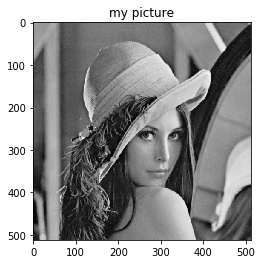

In [75]:
plt.imshow(img,cmap = plt.cm.gray)
plt.title('my picture')
plt.show()


Function parse_text(file_path) to encode the contents of the text file into list of ascii code characters

In [76]:
def parse_text(path):
    with open(path,'r') as fh:
        text=fh.read()
    
    length_of_data=len(text)
    encoded_data=[]
    
    for char in text:
        encoded_data.append(ord(char))
        
        
    return encoded_data

Store the ascii code values of text file in **encoded_data** variable

In [77]:
encoded_data=parse_text("StegoDataset\StegoDataset\Text.txt")

Function **num2bin(number,levels=8)** to convert number to binary list of size *levels*

In [78]:
def num2bin(num,levels=8):
    li=levels*[0]
    
    strg_num=bin(num)[2:]+""
    strg_num=strg_num[::-1]
    
    for indx,i in enumerate(strg_num):
        if i==str(1):        
            li[levels-indx-1]=1
            
    return li

Function **bin2num(number,levels=8)** to convert binary list of size *levels* to  decimal number

In [79]:
def bin2num(binlist,levels=8):
    
    binlist=binlist[::-1]
    
    num=0
    for i in range(levels):
        num+=(binlist[i]*(2**i))
    return num

# Main Method for encryption

In [80]:
def stegano(img_org,encoded_data,levels=8,degree=1):
    
    img=img_org.copy()
    ## make a copy to avoid changes to original image
    
    
    
    rows,cols=img.shape
    
    
    
    if len(encoded_data*levels)> rows*cols:
        print("Size exception")
        return 
    
    # If number of characters * 8 > dimensions of image, we can't store it
    
    
    text_tracker=-1             # Used as pointer to move across the characters
    binlist=[]                  # Whenever this is empty, fetch a character and store its binary list into it.
    
    operations=0
    for row in range(rows):
        
        for col in range(cols):
            operations+=1
            
            
            if len(binlist)==0 and text_tracker<len(encoded_data):
                
                text_tracker=text_tracker+1                          # For fetching a new character

                if text_tracker>=len(encoded_data):
                    return img
                
                ascii_code= encoded_data[text_tracker]             # Fetched
                binlist=num2bin(ascii_code)                        # Storing binary list of size *levels* into binlist
            
            
            
            text_bits=[]                  # This stores the binary bits that needs to stored in the pixel as per degree
            
            for k in range(min(degree,len(binlist))):       
            
                text_bits.append(binlist[-1])
                binlist=binlist[:-1]
                
                
            
            pixel_binlist=num2bin(img[row,col])
                        
            for k in range(min(degree,len(text_bits))):
                last_pix=text_bits[k]
                pixel_binlist[levels-1-k]=last_pix
            
                    
                
                
            newpixel_value=bin2num(pixel_binlist)
            img[row,col]=newpixel_value
            
    
    print(text_tracker)
                
            
    return img
            

In [91]:
new_img=stegano(img,encoded_data,levels=8,degree=4)

In [92]:
new_img

array([[165, 164, 168, ..., 166, 145, 135],
       [165, 167, 165, ..., 167, 147, 135],
       [160, 162, 160, ..., 166, 146, 135],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [93]:
cv2.imwrite('encoded_Lena.tiff',new_img)

True

In [94]:
new_img[0][:8]

array([165, 164, 168, 167, 160, 151, 172, 166], dtype=uint8)

In [95]:
img[0][:8]

array([162, 162, 162, 161, 162, 157, 163, 161], dtype=uint8)

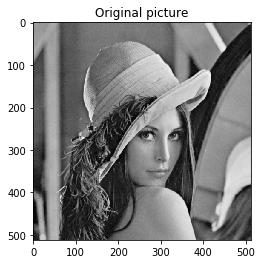

In [96]:
plt.imshow(img,cmap = plt.cm.gray)
plt.title('Original picture')
plt.show()


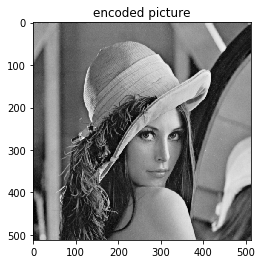

In [97]:
plt.imshow(new_img,cmap = plt.cm.gray)
plt.title('encoded picture')
plt.show()


In [98]:
def reverse_stegano(img_enc,desired_size,levels=8,degree=1):
    
    img=img_enc.copy()
    
    rows,cols=img.shape
    
    if desired_size*levels> rows*cols:
        print("Size exception")
        return 
    
    text_tracker=desired_size-1
    binlist=[]
    
    required_text=''
    
    req_data=[]
    
    for row in range(rows):
        
        for col in range(cols):

            if len(binlist)>=levels and text_tracker>=0:
                text_tracker=text_tracker-1      
                
                
                req_data.append(bin2num(binlist[::-1]))
                ascii_code= chr(bin2num(binlist[::-1]))
                required_text+=ascii_code
                binlist=binlist[levels:]
                
            if text_tracker<0:

                print(required_text)
                return img,req_data
            
            

            pixel_binlist=num2bin(img[row,col])
            
        
            for k in range(min(degree,len(pixel_binlist))):
                binlist.append(pixel_binlist.pop())
                
                

In [99]:
_,enc_data=reverse_stegano(new_img,830,levels=8,degree=4)

Exploring Image Binarization Techniques - The book focuses on an image processing technique known as binarization. It provides a comprehensive survey over existing binarization techniques for both document and graphic images. A number of evaluation techniques have been presented for quantitative comparison of different binarization methods. The book provides results obtained comparing a number of standard and widely used binarization algorithms using some standard evaluation metrics. The comparative results presented in tables and charts facilitates understanding the process. In addition to this, the book presents techniques for preparing a reference image which is very much important for quantitative evaluation of the binarization techniques. The results are produced taking image samples from standard image databases.
